<a href="https://colab.research.google.com/github/ananboon/Data-science-portfolio/blob/main/MNIST_dataset_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
import tensorflow as tf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [122]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)

In [123]:
print('Traning data shape', x_train.shape)
print('Traning label shape',y_train.shape)

print('Test data shape',x_test.shape)
print('Test label shape',y_test.shape)

labels = np.unique(y_train)

labelsCount = pd.Series(y_train).value_counts()
print('Labels',Labels)
print('labelsCount\n',labelsCount)

Traning data shape (60000, 28, 28)
Traning label shape (60000,)
Test data shape (10000, 28, 28)
Test label shape (10000,)
Labels [0 1 2 3 4 5 6 7 8 9]
labelsCount
 1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64


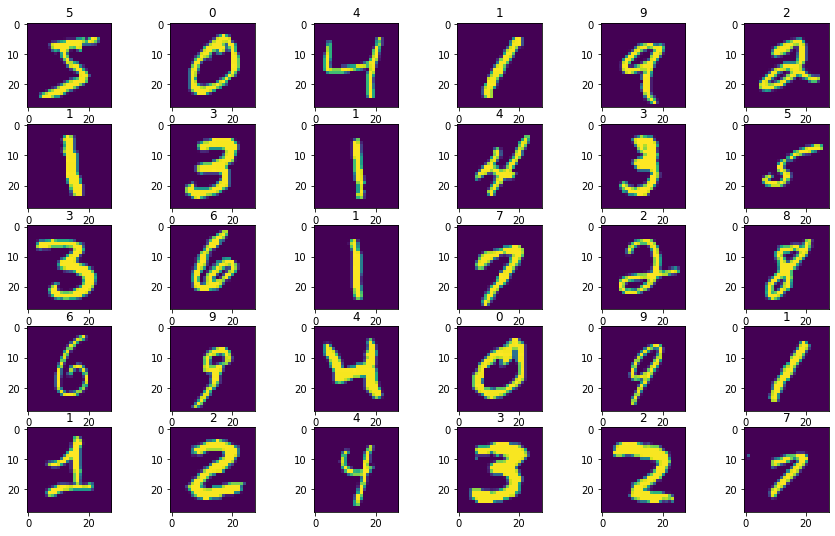

In [124]:
# Plot some data
plt.figure(figsize=(15,9))
for i in range(30):
  plt.subplot(5,6,1+i)
  plt.title(y_train[i])
  plt.imshow(x_train[i].reshape(28,28))

In [126]:
# augment & rescale data

trainDatagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255.,
    rotation_range = 10, 
    width_shift_range = 0.1 , height_shift_range = 0.1,
    zoom_range = 0.1)

testDatagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

In [145]:

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D( 64,(3,3),input_shape=(28,28,1), activation=tf.nn.relu),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Conv2D( 32,(3,3),input_shape=(28,28,1), activation=tf.nn.relu),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) # ten classes classification
])

In [146]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                8010      
Total params: 27,114
Trainable params: 27,114
Non-trainable params: 0
__________________________________________________

In [168]:
model.compile(optimizer='adam',metrics=['acc'],loss='sparse_categorical_crossentropy')

history = model.fit_generator(trainDatagen.flow(tf.expand_dims(x_train, -1),y_train,batch_size = 32),
                              validation_data = testDatagen.flow(tf.expand_dims(x_test, -1),y_test),
                              epochs=10,verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0547 - acc: 0.9830 - val_loss: 0.0340 - val_acc: 0.9901
Epoch 2/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0544 - acc: 0.9838 - val_loss: 0.0256 - val_acc: 0.9918
Epoch 3/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0513 - acc: 0.9839 - val_loss: 0.0315 - val_acc: 0.9905
Epoch 4/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0474 - acc: 0.9846 - val_loss: 0.0274 - val_acc: 0.9908
Epoch 5/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0478 - acc: 0.9857 - val_loss: 0.0292 - val_acc: 0.9909
Epoch 6/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0470 - acc: 0.9854 - val_loss: 0.0251 - val_acc: 0.9921
Epoch 7/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0463 - acc: 0.9857 - val_loss: 0.0281 - val_acc: 0.9907
Epoch 8/10
1875/1875 [==========================

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


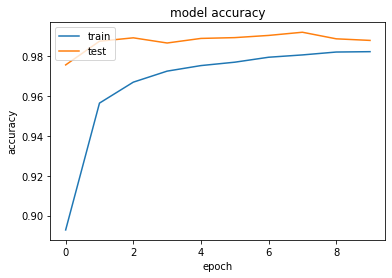

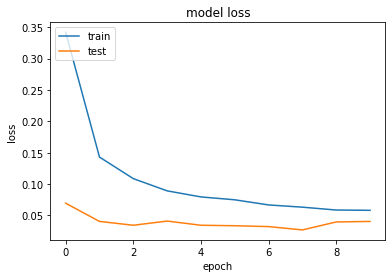

In [149]:

print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [170]:
# prediction = model.predict(tf.expand_dims(x_test/255., -1))
# print(prediction)
# # wrong_predictions = x_test[prediction != y_test]
# # print(wrong_predictions)